In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.spatial.transform import Rotation

In [3]:
work_dir = Path(r"D:\Work\2023\three_gorge\roll")
sima_path = work_dir/".."/"suyu_freedecay_data.csv"
cfd_path = work_dir/"RB_DATA.dat"

In [4]:
sima_data_df = pd.read_csv(sima_path)
sima_data_df.head()

,Time [s],heave [m],roll [deg],pitch [deg]
0,0.0,3.682258,4.979211,4.809143
1,0.1,3.679563,4.976808,4.807217
2,0.2,3.668353,4.969272,4.802440
3,0.3,3.648300,4.956541,4.794720
4,0.4,3.619188,4.938879,4.784087


In [5]:
cfd_data_df = pd.read_csv(cfd_path, sep="\s+",engine='python')
cfd_data_df = cfd_data_df.iloc[0::3,:]
# Get rid of spaces in the columns
cfd_data_df.columns = cfd_data_df.columns.str.replace(" ", "")
cfd_data_df.columns

Index(['Time', 'CORx', 'CORy', 'CORz', 'COMx', 'COMy', 'COMz', 'Rxx', 'Rxy',
       'Rxz', 'Ryx', 'Ryy', 'Ryz', 'Rzx', 'Rzy', 'Rzz', 'vx', 'vy', 'vz', 'wx',
       'wy', 'wz'],
      dtype='object')

In [6]:
cfd_data_df.head()

,Time,CORx,CORy,CORz,COMx,COMy,COMz,Rxx,Rxy,Rxz,...,Ryz,Rzx,Rzy,Rzz,vx,vy,vz,wx,wy,wz
0,0.001200,43.87862,-2.398088e-10,-1.138963,43.87862,-2.398088e-10,-1.138963,1.0,-1.568928e-12,2.199534e-11,...,1.888998e-09,-2.199534e-11,-1.888998e-09,1.0,3.350796e-08,-3.997613e-07,0.000216,-0.000003,3.666623e-08,2.615402e-09
3,0.002639,43.87862,-3.211013e-08,-1.138963,43.87862,-3.211013e-08,-1.138963,1.0,1.442421e-11,1.462859e-10,...,1.094073e-08,-1.462859e-10,-1.094073e-08,1.0,-8.189379e-09,-2.894835e-05,0.000650,-0.000010,1.318253e-07,-1.309545e-08
6,0.004365,43.87862,-4.608361e-08,-1.138961,43.87862,-4.608361e-08,-1.138961,1.0,4.672923e-11,4.073135e-10,...,3.293771e-08,-4.073135e-10,-3.293771e-08,1.0,7.385156e-07,-1.001261e-05,0.000907,-0.000017,1.949942e-07,-2.444636e-08
9,0.006435,43.87862,-5.068223e-08,-1.138959,43.87862,-5.068223e-08,-1.138959,1.0,1.111427e-10,9.056250e-10,...,7.503559e-08,-9.056250e-10,-7.503559e-08,1.0,1.548685e-06,3.346966e-06,0.001275,-0.000024,2.855473e-07,-3.794731e-08
12,0.008918,43.87862,-5.228092e-08,-1.138955,43.87862,-5.228092e-08,-1.138955,1.0,2.221182e-10,1.791455e-09,...,1.484188e-07,-1.791455e-09,-1.484188e-07,1.0,2.196618e-06,3.215272e-06,0.001821,-0.000034,4.160867e-07,-5.240178e-08


In [7]:
def get_euler_angles(df):
    orientation = df[['Rxx', 'Rxy','Rxz', 'Ryx', 'Ryy', 'Ryz', 'Rzx', 'Rzy', 'Rzz']].values
    R = np.reshape(orientation, (3, 3))
    roll = np.arctan2(R[2, 1], R[2, 2])
    pitch = np.arctan2(-R[2, 0], np.sqrt(R[2, 1]**2 + R[2, 2]**2))
    yaw = np.arctan2(R[1, 0], R[0, 0])
    roll_degrees = np.degrees(roll)+5
    pitch_degrees = np.degrees(pitch)
    yaw_degrees = np.degrees(yaw)
    return roll_degrees, pitch_degrees, yaw_degrees

In [8]:
cfd_data_df[['Roll', 'Pitch', 'Yaw']] = cfd_data_df.apply(get_euler_angles, axis=1, result_type='expand')

In [9]:
cfd_data_df.head()

,Time,CORx,CORy,CORz,COMx,COMy,COMz,Rxx,Rxy,Rxz,...,Rzz,vx,vy,vz,wx,wy,wz,Roll,Pitch,Yaw
0,0.001200,43.87862,-2.398088e-10,-1.138963,43.87862,-2.398088e-10,-1.138963,1.0,-1.568928e-12,2.199534e-11,...,1.0,3.350796e-08,-3.997613e-07,0.000216,-0.000003,3.666623e-08,2.615402e-09,5.000000,1.260240e-09,8.989293e-11
3,0.002639,43.87862,-3.211013e-08,-1.138963,43.87862,-3.211013e-08,-1.138963,1.0,1.442421e-11,1.462859e-10,...,1.0,-8.189379e-09,-2.894835e-05,0.000650,-0.000010,1.318253e-07,-1.309545e-08,4.999999,8.381565e-09,-8.264464e-10
6,0.004365,43.87862,-4.608361e-08,-1.138961,43.87862,-4.608361e-08,-1.138961,1.0,4.672923e-11,4.073135e-10,...,1.0,7.385156e-07,-1.001261e-05,0.000907,-0.000017,1.949942e-07,-2.444636e-08,4.999998,2.333735e-08,-2.677389e-09
9,0.006435,43.87862,-5.068223e-08,-1.138959,43.87862,-5.068223e-08,-1.138959,1.0,1.111427e-10,9.056250e-10,...,1.0,1.548685e-06,3.346966e-06,0.001275,-0.000024,2.855473e-07,-3.794731e-08,4.999996,5.188849e-08,-6.368012e-09
12,0.008918,43.87862,-5.228092e-08,-1.138955,43.87862,-5.228092e-08,-1.138955,1.0,2.221182e-10,1.791455e-09,...,1.0,2.196618e-06,3.215272e-06,0.001821,-0.000034,4.160867e-07,-5.240178e-08,4.999991,1.026428e-07,-1.272645e-08


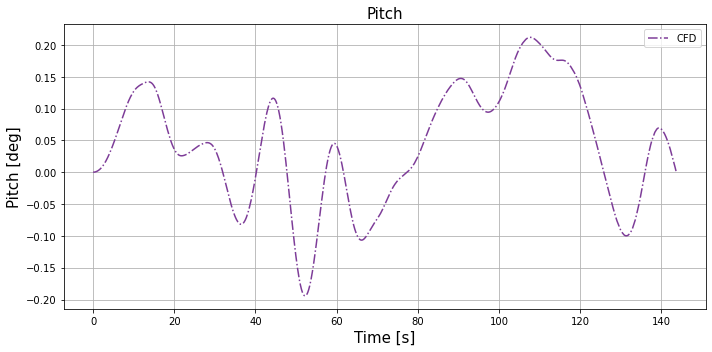

In [10]:
fig,ax = plt.subplots(figsize=(10,5))
# ax.plot(sima_data_df["Time [s]"],sima_data_df["pitch [deg]"], "-", color="#000000", fillstyle="none",markersize=12, label="Sima" )
ax.plot(cfd_data_df['Time'], cfd_data_df['Pitch'], "-.", color="#7D3C98",fillstyle="none",markersize=12,label="CFD")
ax.legend()
ax.grid()
ax.set_xlabel("Time [s]",fontsize=15)
ax.set_ylabel ("Pitch [deg]", fontsize=15)
ax.set_title("Pitch", fontsize=15)
fig.tight_layout()
plt.savefig(work_dir/"heave.jpg", bbox_inches="tight", dpi=400)

In [11]:
cfd_data_df.to_csv(work_dir/"cfd_roll.csv")

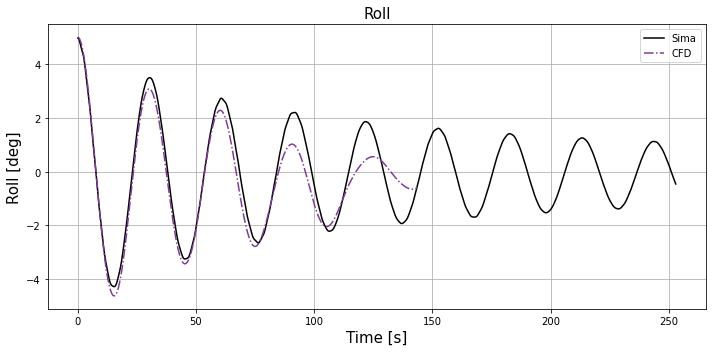

In [12]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(sima_data_df["Time [s]"],sima_data_df["roll [deg]"], "-", color="#000000", fillstyle="none",markersize=12, label="Sima" )
ax.plot(cfd_data_df['Time'], cfd_data_df['Roll'], "-.", color="#7D3C98",fillstyle="none",markersize=12,label="CFD")
ax.legend()
ax.grid()
ax.set_xlabel("Time [s]",fontsize=15)
ax.set_ylabel ("Roll [deg]", fontsize=15)
ax.set_title("Roll", fontsize=15)
fig.tight_layout()
plt.savefig(work_dir/"Roll.jpg", bbox_inches="tight", dpi=400)

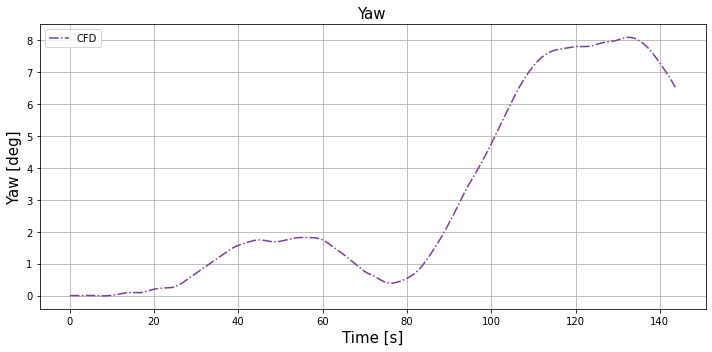

In [13]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(cfd_data_df['Time'], cfd_data_df['Yaw'], "-.", color="#7D3C98",fillstyle="none",markersize=12,label="CFD")
ax.legend()
ax.grid()
ax.set_xlabel("Time [s]",fontsize=15)
ax.set_ylabel ("Yaw [deg]", fontsize=15)
ax.set_title("Yaw", fontsize=15)
fig.tight_layout()
plt.savefig(work_dir/"Yaw.jpg", bbox_inches="tight", dpi=400)